### ImageNet with first 20 classes training

In [8]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models

# importing my own ImageFolder wrapper that allows subclassing
from backdoor.poisoning import ImageFolder
# importing BadNetAttack
from backdoor.attacks import BadNetAttack

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
dir_path = os.getcwd()

In [9]:
train_path = '/data/Data/train'
val_path = '/data/Data/val'

train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229,0.224,0.225]
    )
])

num_folders = 20

trainset = ImageFolder(
    train_path, 
    transform=train_transform, 
    num_classes=num_folders
)

valset = ImageFolder(
    val_path,
    transform=val_transform,
    num_classes=num_folders
)

In [10]:
# Load a pre-trained ResNet model
resnet = models.resnet50(weights=None)
resnet = resnet.to(device)

epochs = 1
batch_size = 32
lr = 1e-3

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=lr)

imagenet_attack = BadNetAttack(
    device,
    resnet,
    trainset,
    valset,
    epochs,
    batch_size,
    optimizer,
    loss_function,
    {
        'poison_ratio': 0.5,
        'target_class': 5,
        'poison_type': 'dirty',
        'trigger_img': 'trigger_10',
        'trigger_size': 50,
    }
)


imagenet_attack.attack()
imagenet_attack.save_model(dir_path+'/models/badnet_imagenet.pth')


Epoch 1
Training loss: 1.4223377414295155
Clean test accuracy: 0.252
Misclassification rate: 0.948
Attack success rate: 1.0

Model saved to /home/sn3006/Desktop/backdoor-toolbox/models/badnet_imagenet.pth


In [ ]:
set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


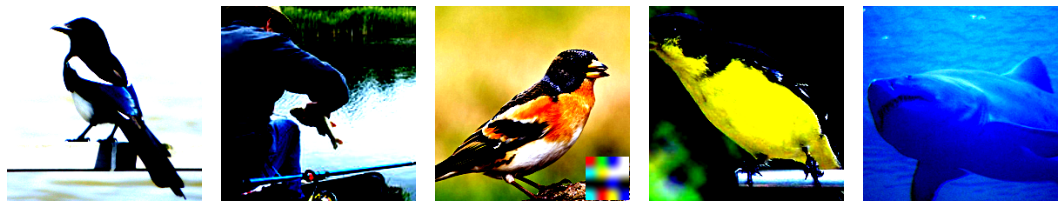

In [11]:
poisoned_trainset = imagenet_attack.poisoned_trainset.poisoned_dataset


labels = {
    0: 'tench, Tinca tinca',
    1: 'goldfish, Carassius auratus',
    2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
    3: 'tiger shark, Galeocerdo cuvieri',
    4: 'hammerhead, hammerhead shark',
    5: 'electric ray, crampfish, numbfish, torpedo',
    6: 'stingray',
    7: 'cock',
    8: 'hen',
    9: 'ostrich, Struthio camelus',
    10: 'brambling, Fringilla montifringilla',
    11: 'goldfinch, Carduelis carduelis',
    12: 'house finch, linnet, Carpodacus mexicanus',
    13: 'junco, snowbird',
    14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
    15: 'robin, American robin, Turdus migratorius',
    16: 'bulbul',
    17: 'jay',
    18: 'magpie',
    19: 'chickadee',
    20: 'water ouzel, dipper',
}


def plot_imagenet_images(dataset, num_images=5):
    
    # Select random images from the dataset
    indices = np.random.choice(len(dataset), size=num_images, replace=False)
    
    # Create a grid of subplots for the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    
    # Plot the selected images
    for i, idx in enumerate(indices):
        image, _, _ = dataset[idx]
        
        # Convert the tensor image to a numpy array and transpose
        image = np.array(image).transpose(1, 2, 0)
        
        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
plot_imagenet_images(poisoned_trainset)